># Support Vector Machine (SVM)
---
> Support Vector Machine (SVM) é uma classe particularmente poderosa e flexível de algoritmos supervisionados para classificação e regressão. Desenvolveremos a intuição por trás de SVMs e seu uso em problemas de classificação.

> Naive Bayes foi um exemplo de classificação generativa onde simplesmente descrevemos a distribuição de cada classe subjacente e usamos esses modelos geradores para determinar probabilisticamente rótulos para novos pontos.; aqui consideraremos a classificação discriminativa: em vez de modelar cada classe, simplesmente encontramos uma linha ou curva (em duas dimensões) ou múltipla (em múltiplas dimensões) que divide as classes umas das outras.
---





In [0]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets.samples_generator import make_blobs

In [0]:
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)

In [0]:
print(X[:10])
print(y)

[[ 1.41281595  1.5303347 ]
 [ 1.81336135  1.6311307 ]
 [ 1.43289271  4.37679234]
 [ 1.87271752  4.18069237]
 [ 2.09517785  1.0791468 ]
 [ 2.73890793  0.15676817]
 [ 3.18515794  0.08900822]
 [ 2.06156753  1.96918596]
 [ 2.03835818  1.15466278]
 [-0.04749204  5.47425256]]
[1 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 1 0 0 1 1 1 1 1 0 0 0 1 0 1 0 0 0 0 1 1
 0 1 0 1 0 1 1 0 1 1 0 1 0]


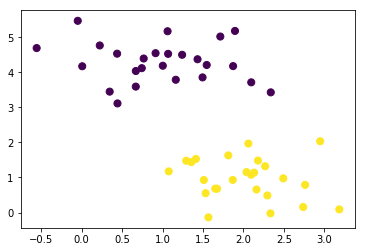

In [0]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50);

---
> Um classificador discriminativo linear tentaria desenhar uma linha reta separando os dois conjuntos de dados e, assim, criar um modelo para classificação. Para dados bidimensionais como o mostrado aqui, essa é uma tarefa que poderíamos fazer manualmente. Mas imediatamente vemos um problema: há mais de uma linha divisória que pode discriminar perfeitamente entre as duas classes!
---


In [0]:
xfit = np.linspace(-1, 3.5)
xfit

array([-1.        , -0.90816327, -0.81632653, -0.7244898 , -0.63265306,
       -0.54081633, -0.44897959, -0.35714286, -0.26530612, -0.17346939,
       -0.08163265,  0.01020408,  0.10204082,  0.19387755,  0.28571429,
        0.37755102,  0.46938776,  0.56122449,  0.65306122,  0.74489796,
        0.83673469,  0.92857143,  1.02040816,  1.1122449 ,  1.20408163,
        1.29591837,  1.3877551 ,  1.47959184,  1.57142857,  1.66326531,
        1.75510204,  1.84693878,  1.93877551,  2.03061224,  2.12244898,
        2.21428571,  2.30612245,  2.39795918,  2.48979592,  2.58163265,
        2.67346939,  2.76530612,  2.85714286,  2.94897959,  3.04081633,
        3.13265306,  3.2244898 ,  3.31632653,  3.40816327,  3.5       ])

[-1.         -0.90816327 -0.81632653 -0.7244898  -0.63265306 -0.54081633
 -0.44897959 -0.35714286 -0.26530612 -0.17346939 -0.08163265  0.01020408
  0.10204082  0.19387755  0.28571429  0.37755102  0.46938776  0.56122449
  0.65306122  0.74489796  0.83673469  0.92857143  1.02040816  1.1122449
  1.20408163  1.29591837  1.3877551   1.47959184  1.57142857  1.66326531
  1.75510204  1.84693878  1.93877551  2.03061224  2.12244898  2.21428571
  2.30612245  2.39795918  2.48979592  2.58163265  2.67346939  2.76530612
  2.85714286  2.94897959  3.04081633  3.13265306  3.2244898   3.31632653
  3.40816327  3.5       ]


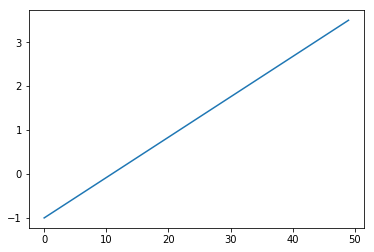

In [0]:
xfit = np.linspace(-1, 3.5)
print(xfit)
plt.plot(xfit)

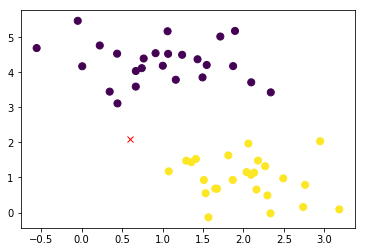

In [0]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50)
plt.plot([0.6], [2.1], 'x', color='red')

---
> Abaixo temos três separadores muito diferentes que, no entanto, discriminam perfeitamente entre estas amostras. Dependendo de qual você escolher, um novo ponto de dados (por exemplo, aquele marcado pelo "X" neste gráfico) receberá um rótulo diferente! Evidentemente, nossa simples intuição de "traçar uma linha entre as classes" não é suficiente, e precisamos pensar um pouco mais profundamente.
---

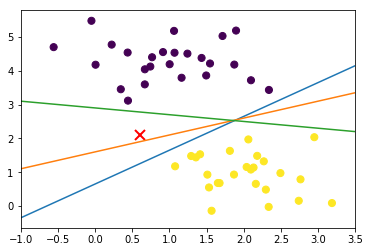

In [0]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50)
plt.plot([0.6], [2.1], 'x', color='red',
         markeredgewidth=2, # grossura do X
         markersize=10) # tamanho do X

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-')

plt.xlim(-1, 3.5);

---
># Maximizando a Margem
---
> As SVMs oferecem uma maneira de melhorar isso. A intuição é a seguinte: em vez de simplesmente desenhar uma linha de largura zero entre as classes, podemos desenhar em torno de cada linha uma margem de alguma largura, até o ponto mais próximo. 

> Em máquinas de vetores de suporte, a linha que maximiza essa margem é a que escolheremos como o modelo ideal. As máquinas de vetores de suporte são um exemplo de um estimador de margem máximo.
---

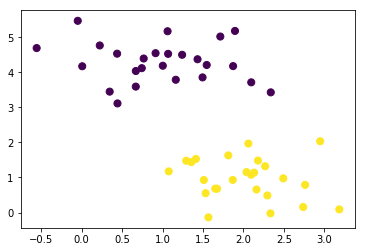

In [0]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50)

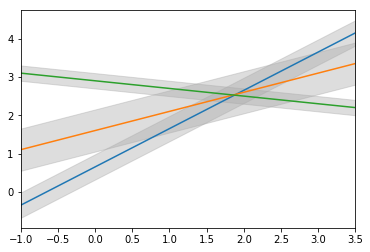

In [0]:
for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5);

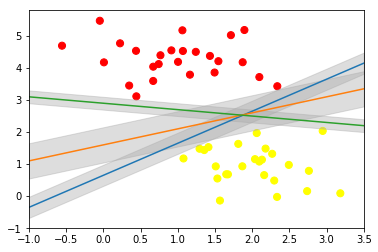

In [0]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5);

---
# Fitting model SVM
---

In [0]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [0]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

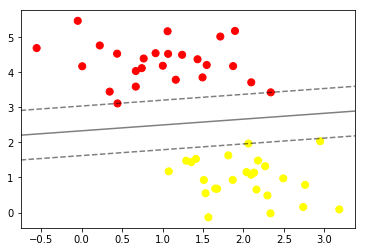

In [0]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model);

---
> Esta é a linha divisória que maximiza a margem entre os dois conjuntos de pontos. Observe que alguns dos pontos de treinamento apenas tocam na margem. Esses pontos são os elementos centrais desse ajuste e são conhecidos como vetores de suporte, e dão o nome ao algoritmo. No Scikit-Learn, a identidade desses pontos é armazenada no atributo support_vectors_ do classificador.
---

In [0]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

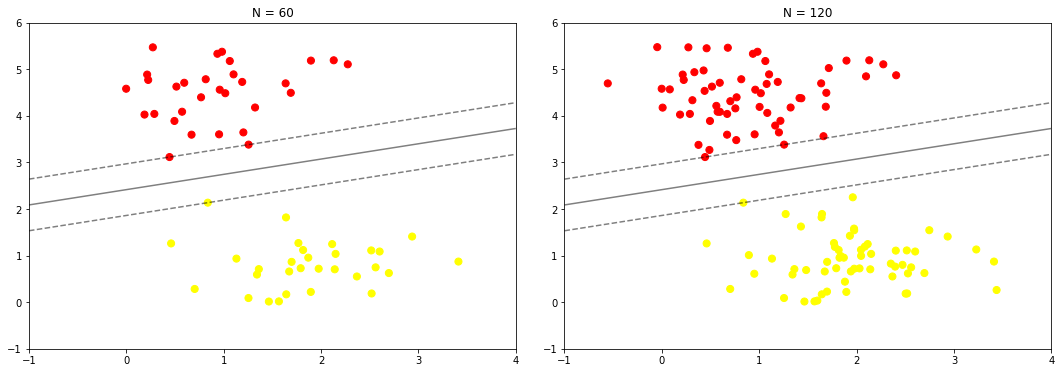

In [0]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)
    
    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

---
> Uma chave para o sucesso desse classificador é que, para o ajuste, apenas a posição dos vetores de suporte é importante; quaisquer pontos além da margem que estão no lado correto não modificam o ajuste! Tecnicamente, isso ocorre porque esses pontos não contribuem para a função de perda usada para ajustar o modelo, portanto, sua posição e número não importam, desde que não cruzem a margem.

>  No painel esquerdo, vemos o modelo e os vetores de suporte para 60 pontos de treinamento. No painel direito, duplicamos o número de pontos de treinamento, mas o modelo não mudou: os três vetores de suporte do painel esquerdo ainda são os vetores de suporte do painel direito. Essa insensibilidade ao comportamento exato de pontos distantes é um dos pontos fortes do modelo SVM.
---

In [0]:
from ipywidgets import interact, fixed
interact(plot_svm, N=[10, 100], ax=fixed(None));

interactive(children=(Dropdown(description='N', options=(10, 100), value=10), Output()), _dom_classes=('widget…

---
# Dados que não são Linearmente separaveis
---

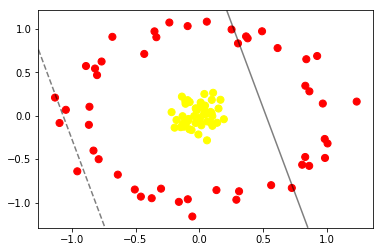

In [0]:
from sklearn.datasets.samples_generator import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

---
> Onde o SVM se torna extremamente poderoso é quando é combinado com kernels, onde projetamos nossos dados em um espaço de dimensões maiores, definido por funções polinomiais e de base Gaussiana, e assim conseguimos ajustar-nos a relações não-lineares com um classificador linear.

> É claro que nenhuma discriminação linear será capaz de separar esses dados. Logo uma solição seria se pudessemos projetar os dados em uma dimensão maior, de modo que um separador linear seria suficiente. Por exemplo, uma simples projeção que poderíamos usar seria calcular uma função de base radial centrada no meio do clump:
---

In [0]:
r = np.exp(-(X ** 2).sum(1))
r

array([0.96212569, 0.26683044, 0.9994773 , 0.35454764, 0.34135018,
       0.97028631, 0.29999101, 0.3280667 , 0.98285487, 0.9962492 ,
       0.97116724, 0.4570525 , 0.32916998, 0.9896215 , 0.99048018,
       0.958567  , 0.97550623, 0.44589931, 0.98922346, 0.99337844,
       0.99175259, 0.9741671 , 0.96980421, 0.99498024, 0.21322809,
       0.37741448, 0.33367192, 0.26590825, 0.30601104, 0.32495817,
       0.99207797, 0.38489656, 0.99131239, 0.41751975, 0.97012136,
       0.99047641, 0.35090139, 0.419286  , 0.42337491, 0.97719187,
       0.30927601, 0.96611033, 0.96933575, 0.96115817, 0.93549956,
       0.99208519, 0.37572859, 0.27626076, 0.35252948, 0.94104396,
       0.96073212, 0.45087824, 0.42534152, 0.98482369, 0.96262467,
       0.92239567, 0.91899653, 0.36019278, 0.99836411, 0.99742399,
       0.98739186, 0.34284611, 0.93825768, 0.98591669, 0.42770086,
       0.96179576, 0.96986979, 0.29932358, 0.37972812, 0.98224993,
       0.38225225, 0.95403248, 0.39273913, 0.95230041, 0.40076

In [0]:
from mpl_toolkits import mplot3d

def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=[30, 90], azip=(-180, 180),
         X=fixed(X), y=fixed(y));

interactive(children=(Dropdown(description='elev', options=(30, 90), value=30), IntSlider(value=30, descriptio…

In [0]:
X

array([[ 0.19210922, -0.04128231],
       [-1.13048215,  0.20773053],
       [ 0.00799334, -0.02142291],
       [ 0.98224338, -0.26853398],
       [ 0.86053825, -0.57820441],
       [-0.07576573,  0.15628063],
       [-0.23484135,  1.07184528],
       [-0.88791757,  0.57108732],
       [-0.13133702, -0.0066632 ],
       [ 0.04644734,  0.04000626],
       [ 0.15030186,  0.08164524],
       [ 0.30294198,  0.83137427],
       [ 1.00436122, -0.32006178],
       [ 0.10197654, -0.00578964],
       [ 0.08795766,  0.04276533],
       [ 0.0974098 ,  0.18118263],
       [-0.12868476, -0.09076872],
       [ 0.83028514,  0.34393125],
       [-0.08759859, -0.05622733],
       [-0.01252945,  0.08053939],
       [ 0.06220553, -0.06642352],
       [ 0.13933838, -0.08220247],
       [-0.12047725, -0.1270681 ],
       [ 0.06364183,  0.0313387 ],
       [ 1.23257415,  0.16172133],
       [-0.7656979 ,  0.62299117],
       [-1.0455195 ,  0.0669778 ],
       [-0.9560305 , -0.64078827],
       [ 0.49125282,

In [0]:
(X).sum(1)

array([ 0.15082691, -0.92275162, -0.01342957,  0.7137094 ,  0.28233384,
        0.0805149 ,  0.83700392, -0.31683026, -0.13800023,  0.08645359,
        0.2319471 ,  1.13431625,  0.68429944,  0.0961869 ,  0.13072299,
        0.27859243, -0.21945348,  1.17421638, -0.14382592,  0.06800994,
       -0.004218  ,  0.05713591, -0.24754535,  0.09498053,  1.39429548,
       -0.14270673, -0.9785417 , -1.59681878,  1.46223416,  1.48749554,
       -0.11364774,  1.10629861, -0.12371161, -1.29012748,  0.02845194,
        0.12664334,  1.2441743 , -1.31786069, -0.33483646,  0.16198353,
        1.14026339, -0.22877904, -0.22661916,  0.05679974,  0.08268262,
        0.05622361, -1.35601105,  0.22584229, -1.32356104,  0.34820713,
        0.08664392, -1.14055094, -0.55939323,  0.15988689,  0.07298762,
        0.37085919, -0.2244191 , -0.67795967, -0.04519579,  0.06541379,
       -0.09565689,  0.93888183,  0.28871869,  0.00885378, -1.23146097,
       -0.2788082 , -0.23445677, -1.17977048,  0.24044313, -0.18

In [0]:
# e^(-(x[0]+x[1])^2)
r = np.exp(-(X ** 2).sum(1))
r

array([0.96212569, 0.26683044, 0.9994773 , 0.35454764, 0.34135018,
       0.97028631, 0.29999101, 0.3280667 , 0.98285487, 0.9962492 ,
       0.97116724, 0.4570525 , 0.32916998, 0.9896215 , 0.99048018,
       0.958567  , 0.97550623, 0.44589931, 0.98922346, 0.99337844,
       0.99175259, 0.9741671 , 0.96980421, 0.99498024, 0.21322809,
       0.37741448, 0.33367192, 0.26590825, 0.30601104, 0.32495817,
       0.99207797, 0.38489656, 0.99131239, 0.41751975, 0.97012136,
       0.99047641, 0.35090139, 0.419286  , 0.42337491, 0.97719187,
       0.30927601, 0.96611033, 0.96933575, 0.96115817, 0.93549956,
       0.99208519, 0.37572859, 0.27626076, 0.35252948, 0.94104396,
       0.96073212, 0.45087824, 0.42534152, 0.98482369, 0.96262467,
       0.92239567, 0.91899653, 0.36019278, 0.99836411, 0.99742399,
       0.98739186, 0.34284611, 0.93825768, 0.98591669, 0.42770086,
       0.96179576, 0.96986979, 0.29932358, 0.37972812, 0.98224993,
       0.38225225, 0.95403248, 0.39273913, 0.95230041, 0.40076

---
> Podemos ver que, com essa dimensão adicional, os dados se tornam trivialmente linearmente separáveis, desenhando um plano de separação em, digamos, r = 0,7.

>Uma estratégia para encontrar automaticamente as melhores funções básicas para usar é calcular uma função de base centrada em cada ponto do conjunto de dados e deixar o algoritmo SVM filtrar os resultados. Esse tipo de transformação de função de base é conhecida como transformação de kernel, pois é baseada em um relacionamento de similaridade (ou kernel) entre cada par de pontos.

>Um problema em potencial com essa estratégia - projetando N pontos em N dimensões - é que ele pode se tornar muito intensivo computacionalmente à medida que N cresce. No entanto, por causa de um pequeno procedimento conhecido como o truque do kernel, um ajuste nos dados transformados pelo kernel pode ser feito implicitamente - ou seja, sem nunca construir o N completo

> Representação tridimensional da projeção do kernel! Este truque do kernel está embutido no SVM e é uma das razões pelas quais o método é tão poderoso.

> No Scikit-Learn, podemos aplicar o SVM no kernel simplesmente mudando o nosso kernel linear para um kernel **RBF** (radial basis function), usando o hyperparameter do modelo do kernel:
---

In [0]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1000000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

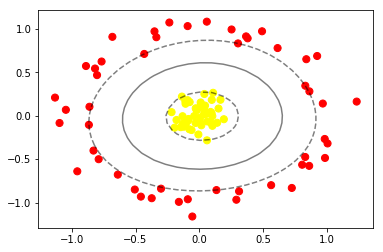

In [0]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none');

---
> Usando esta máquina de vetores de suporte ao kernel, aprendemos um limite de decisão não linear adequado. Esta estratégia de transformação do kernel é usada frequentemente em aprendizado de máquina para transformar métodos lineares rápidos em métodos não-lineares rápidos, especialmente para modelos nos quais o truque do kernel pode ser usado.
---

---
# Ajustando o modelo
---
> Nossa discussão até o momento centrou-se em torno de conjuntos de dados muito limpos, nos quais existe um limite de decisão perfeito. Mas e se seus dados tiverem alguma quantidade de sobreposição? Por exemplo, você pode ter dados como este:
---

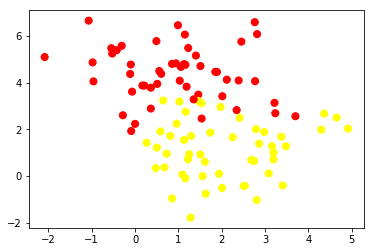

In [0]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

---
> Para lidar com esse caso, a implementação do SVM possui um fator de correção que "suaviza" a margem: isto é, permite que alguns dos pontos se insiram na margem, se isso permitir um melhor ajuste. A dureza da margem é controlada por um parâmetro de ajuste, mais conhecido como C. Para C muito grande, a margem é difícil e os pontos não podem estar nela. Para menor C, a margem é mais suave e pode crescer para abranger alguns pontos.

> O gráfico mostrado abaixo dá uma imagem visual de como uma mudança do parâmetro C afeta o ajuste final, através do amolecimento da margem:
---

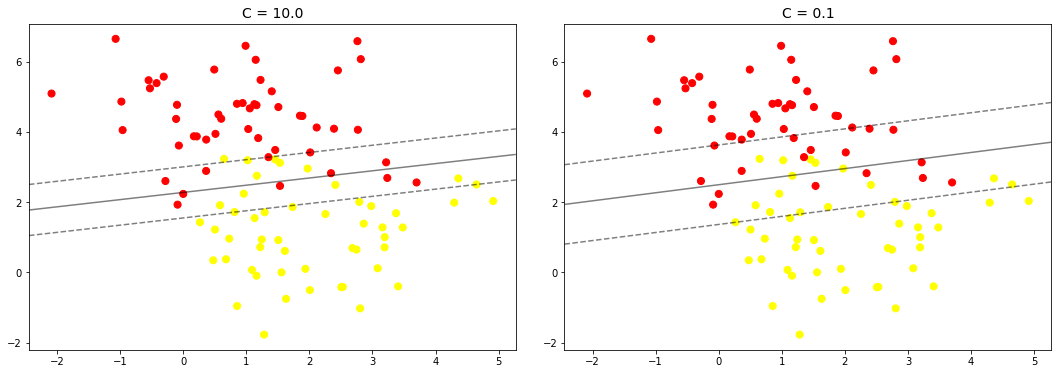

In [0]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)

># Exemplificando

In [0]:
import numpy as np
from sklearn import datasets, svm
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [0]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
classes = {i: value for i, value in enumerate(iris.target_names)}
y_names = [classes[i] for i in y]

In [71]:
df = pd.DataFrame({'sepal_length': X[:,0], 
                   'sepal_width':X[:,1], 
                   'petal_length': X[:,2], 
                   'petal_width': X[:,3], 
                   'target_values': y, 
                   'target_names': y_names})
df = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'target_values', 'target_names']]
df.head()

,sepal_length,sepal_width,petal_length,petal_width,target_values,target_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


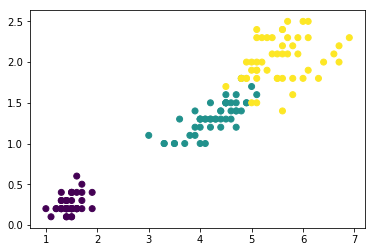

In [72]:
plt.scatter(df['petal_length'], df['petal_width'], c=df['target_values'])

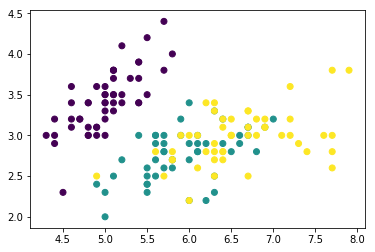

In [73]:
plt.scatter(df['sepal_length'], df['sepal_width'], c=df['target_values'])

In [0]:
# X =  colunas de informação, variáveis independentes
X = df[['petal_length', 'petal_width']]
# y = Variável dependente, a qual será utilizada para classificar os dados
y = df['target_names']

In [0]:
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3)

In [0]:
model = SVC(kernel='linear', C=0.1).fit(X_train, y_train)

In [0]:
y_pred = model.predict(X_test) 

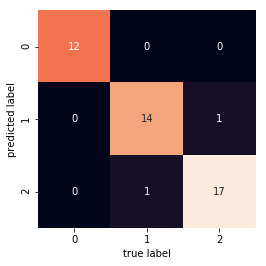

In [79]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [0]:
# X =  colunas de informação, variáveis independentes
X = df.drop(['target_values', 'target_names'], axis=1)
# y = Variável dependente, a qual será utilizada para classificar os dados
y = df['target_names']

In [0]:
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3)

In [0]:
model = SVC(kernel='linear', C=0.1).fit(X_train, y_train)

In [0]:
y_pred = model.predict(X_test) 

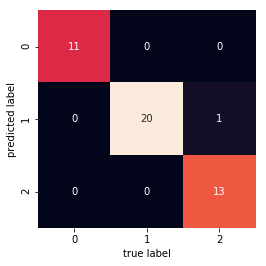

In [89]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');